# **Introduction**
---

**About the Dataset**
---
---

It is a **collection of facial images** of various **celebrities and public figures**, including **actors, musicians, politicians, athletes, and social media influencers**. The dataset includes a total of **107,818 images of 1,063 different individuals**.

The images are provided in **JPEG format** and are of **varying sizes and qualities**. Some **images are high-quality studio portraits**, while others are **candid snapshots taken in various settings**. The **images also vary in terms of lighting, poses, facial expressions, and other factors**.

In **addition to the images**, the dataset also **includes a CSV file** that contains **metadata** for **each individual, including their name, gender,** and the **number of images available for that individual**.

The dataset is intended for use in research related to **facial recognition and computer vision**, and could be used to **train machine learning algorithms** for tasks such as **face recognition**, **facial expression analysis**, and **age estimation**.

**Problem to Tackle**
---

---
The **facial recognition problem** in the **context of this dataset** is to develop a **machine learning model** that can **accurately identify individuals** from their **facial images**. Given a new image of a person's face, the **goal** of the **model** would be to **correctly identify** the **person** in the **image** by matching it with the **images of known individuals in the dataset**.

The **facial recognition problem** is a **challenging one** due to the **variability of facial features** across **individuals** and the **presence of various factors** that can **affect facial appearance**, such as **lighting, pose, expression, and occlusions**. However, the **large size** and **diversity** of the **PINS Face Recognition Dataset** provide a **good opportunity** to **develop and test facial recognition models** that are **robust to these factors**.

The **problem of facial recognition** has many **potential applications**, including **security systems, access control, personal identification, and more**. However, it is **important** to ensure that these **systems are designed and used in an ethical manner**, with appropriate safeguards to protect **privacy and prevent misuse**.

**Solution Framework**
---
---
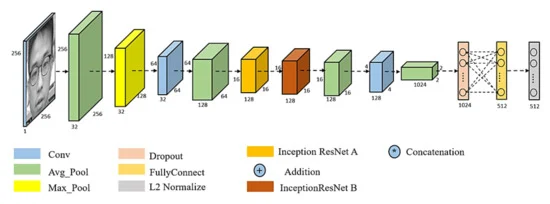

The **FaceNet** model can be used to **solve the facial recognition problem** by learning a **high-dimensional embedding** of **face images** that **captures the unique features** of **each individual's face**. Here is a **high-level** overview of how **FaceNet** can be used to solve this problem:

* **Preprocessing the data**: The first step is to preprocess the data by normalizing the pixel values and aligning the faces in the images. This can be done using a face detection algorithm and a face alignment algorithm.

* **Training the FaceNet model**: Once the data has been preprocessed, the next step is to train the FaceNet model. During training, the model learns to map face images to a high-dimensional embedding space where similar faces are close together and dissimilar faces are far apart.

* **Fine-tuning the FaceNet model**: After training the model, it can be fine-tuned on the PINS Face Recognition Dataset to improve its performance on this specific dataset. This involves using transfer learning to adapt the pre-trained model to the PINS dataset or training the model with additional data from the dataset.

* **Face recognition**: Once the model is trained, it can be used to recognize faces in new images. Given a new face image, the model produces its embedding vector, which is compared to the embedding vectors of known individuals in the dataset. The person whose embedding vector is closest to the input vector is recognized as the person in the image.

* **Evaluation**: The performance of the facial recognition system can be evaluated using metrics such as accuracy, precision, recall, and F1 score. Cross-validation and testing on a separate validation set can also be used to ensure that the model is not overfitting to the training data.

Overall, **FaceNet provides** an **effective solution** for **facial recognition** by **learning a high-dimensional representation** of **face images** that **can capture** the **unique features** of **each individual's face**. The model can be trained on **large-scale datasets**, such as the **PINS Face Recognition Dataset**, to achieve **high accuracy and robustness** in **recognizing faces** in a **variety of settings**. 

In this case, we will be using a **pre-trained faceNet** model. Using a **pre-trained FaceNet** model can be a **very effective approach** for **facial recognition tasks**. **Pre-trained models** are models that have **already been trained on a large amount of data**, and have **learned to recognize a wide variety of features** that are **important for face recognition**. By using a **pre-trained model**, you can **leverage** the **knowledge** that has **already been gained** by the model during the **training process**, and **save time and resources** that would be needed to **train the model from scratch**.

**FaceNet** is a **very powerful** model that has been trained on **large datasets** such as the **CASIA-WebFace dataset**, and has achieved **state-of-the-art performance** on **several benchmark face recognition datasets**. Using a **pre-trained FaceNet** model can **provide a good starting point** for building a **facial recognition system**, and can **save a lot of time and effort compared to training the model from scratch**.

Also, as I have previously explained about **Average Encoding**, I will be using **average encoding solution**. I had talked about average encoding in my notebook : [Avenger Face Recognition](https://www.kaggle.com/code/utkarshsaxenadn/avenger-face-recognition-facenet). 

# **SetUp**

---

Before moving ahead let's **collect and import all the modules** that are **required in the notebook**. This will allow us to **work efficiently throughout the notebook**.

In [ ]:
# Common
import os
import cv2 as cv
import numpy as np
from IPython.display import clear_output as cls

# Data 
from tqdm import tqdm
from glob import glob

# Data Visuaalization
import plotly.express as px
import matplotlib.pyplot as plt

# Model
from tensorflow.keras.models import load_model

In [ ]:
# Setting a random
np.random.seed(42)

# Define the image dimensions
IMG_W, IMG_H, IMG_C = (160, 160, 3)

# **Data Loading**
---

Let's now turn our attention to **loading the data into memory**, a **crucial step** in **face recognition**. In this problem, we typically work with **two types of datasets**.

* The **first** is the **collection of images** we'll use for **testing our model's inference capabilities**. 

* The **second** is the **Database**, which is a **collection of images** used to **compute the embeddings of faces**. We **then compare these embeddings with emebeddings of the new images** to perform **face recognition**, or the **process of determining whether two images depict the same person**. This process is known as **face verification**, and a **more complex version** of this is **face recognition**, which involves **recognizing an individual** from a **set of multiple individuals**.

The **database** has a **significant impact** on the **performance of our model** in **two ways**. 

* First, the **quality of the images** in the **database** can significantly affect our **model's ability** to **recognize faces**. If the images in the **database contain maximum facial features** of the **individual**, our model will **perform better at recognizing that person**. Conversely, if we **collect images randomly**, our **model's performance may suffer**. However, **manually selecting** the **database** is **often impractical due to its size**. In such cases, we can use **random images in the database**.

* The **second factor** that **affects model performance** is the **total number of images** we have **per individual**. In this **dataset**, we have a **large number of images**, and the **images vary significantly** in terms of **lighting, pose, and expression**. To account for this **diversity**, we need a **database** that is **large enough to include embeddings of various diverse images**. Therefore, we will use **10 images per individual** to ensure that our database is **comprehensive** and **diverse enough to improve model performance**.

---
Let's start by first collecting all the images present in the data.

In [ ]:
# Specify the root directory path
root_path = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset/'

# Collect all the person names
dir_names = os.listdir(root_path)
person_names = [name.split("_")[-1].title() for name in dir_names]
n_individuals = len(person_names)

print(f"Total number of individuals: {n_individuals}\n")
print(f"Name of the individuals : \n\t{person_names}")

This appears to be a **list of names** of **various celebrities**, **public figures**, and **notable personalities** from **different fields** such as **entertainment, sports, politics, and technology**. 

These names can be used as **labels or classes** in a **face recognition** or **face verification** problem, where we **aim to recognize or verify the identity of a person based on their facial features**. 

By using this **list of names as labels**, we can **train our model** to **recognize or verify these specific individuals** with a **certain level of accuracy**. It is important to note that this **list is not exhaustive** and **may not cover all possible individuals** that **one might want to recognize or verify in a face recognition system**.

In [ ]:
# Number of images available per person
n_images_per_person = [len(os.listdir(root_path + name)) for name in dir_names]
n_images = sum(n_images_per_person)

# Show
print(f"Total Number of Images : {n_images}.")

There are **105 celebrities** in the **dataset** and a **total of 17534 images**. This means that there are an **average of 167 images per celebrity**, which is a **decent amount of data** for a **facial recognition model**. However, it's important to note that the **performance of the model** will also depend on the **quality and diversity of the images in the dataset**. However, the **total number of images vailable per person** are **not the same**.

In [ ]:
# Plot the Distribution of number of images per person.
fig = px.bar(x=person_names, y=n_images_per_person, color=person_names)
fig.update_layout({'title':{'text':"Distribution of number of images per person"}})
fig.show()

At the **minimum level**, we have identified **80 images per person** in **the dataset**. This means that we have a **substantial amount of images available** for **each individual**, which can help **improve the accuracy and robustness of our face recognition model**. Having a **large number of images per person** allows **the model to better capture the variations in facial expressions, lighting conditions, and poses, which can be critical for accurate recognition**. 

---
Although our dataset contains a **large number of images**, it is **not always necessary** to **load the entire dataset** when **testing the model**. Since we are using a **pre-trained model**, we can **get away with loading only a subset of the data**. This can **significantly reduce the time and computational resources required for the process**.

In [ ]:
# Select all the file paths : 50 images per person.
filepaths = [path  for name in dir_names for path in glob(root_path + name + '/*')[:50]]
np.random.shuffle(filepaths)
print(f"Total number of images to be loaded : {len(filepaths)}")

# Create space for the images
all_images = np.empty(shape=(len(filepaths), IMG_W, IMG_H, IMG_C), dtype = np.float32)
all_labels = np.empty(shape=(len(filepaths), 1), dtype = np.int32)

# For each path, load the image and apply some preprocessing.
for index, path in tqdm(enumerate(filepaths), desc="Loading Data"):
    
    # Extract label
    label = [name[5:] for name in dir_names if name in path][0]
    label = person_names.index(label.title())
    
    # Load the Image
    image = plt.imread(path)
    
    # Resize the image
    image = cv.resize(image, dsize = (IMG_W, IMG_H))
    
    # Convert image stype
    image = image.astype(np.float32)/255.0
    
    # Store the image and the label
    all_images[index] = image
    all_labels[index] = label

# **Data Visualization**
---

Now that we have **successfully loaded our data set**, we can **proceed to visualize it**. **Visualization** is a **crucial step** in any **data analysis task**, as it helps us **gain insight** into the **data and identify any patterns** or **anomalies that might be present**. In the case of **face recognition**, **visualization allows** us to get a **sense of the quality** of the **images** and how well they **represent each individual**. 

In [ ]:
def show_data(
    images: np.ndarray, 
    labels: np.ndarray,
    GRID: tuple=(15,6),
    FIGSIZE: tuple=(25,50), 
    recog_fn = None,
    database = None
) -> None:
    
    """
    Function to plot a grid of images with their corresponding labels.

    Args:
        images (numpy.ndarray): Array of images to plot.
        labels (numpy.ndarray): Array of corresponding labels for each image.
        GRID (tuple, optional): Tuple with the number of rows and columns of the plot grid. Defaults to (15,6).
        FIGSIZE (tuple, optional): Tuple with the size of the plot figure. Defaults to (30,50).
        recog_fn (function, optional): Function to perform face recognition. Defaults to None.
        database (dictionary, optional): Dictionary with the encoding of the images for face recognition. Defaults to None.

Returns:
        None
    """
    
    # Plotting Configuration
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    
    # loop over the images and labels
    for index in range(n_images):
        
        # Select image in the corresponding label randomly
        image_index = np.random.randint(len(images))
        image, label = images[image_index], person_names[int(labels[image_index])]
        
        # Create a Subplot
        plt.subplot(n_rows, n_cols, index+1)
        
        # Plot Image
        plt.imshow(image)
        plt.axis('off')
        
        if recog_fn is None:
            # Plot title
            plt.title(label)
        else:
            recognized = recog_fn(image, database)
            plt.title(f"True:{label}\nPred:{recognized}")
    
    # Show final Plot
    plt.tight_layout()
    plt.show()

In [ ]:
show_data(images = all_images, labels = all_labels)

This **data set** is a **treasure trove of images**, containing a **vast variety of photographs**. The **diversity** of the **images** is **remarkable**, with a **range of lighting conditions, poses, and unique facial features** that **distinguish each individual**. It's fascinating to see how these **well-known figures** are captured in **different moments and situations**. As a **fan of many of these individuals**, it's a **delight to explore** the **collection** and see some of **their candid and posed shots**.

# **Face Database**
---

To build an **effective face recognition** model, it is **crucial** to have a **diverse and comprehensive database of images**. However, **manually selecting images** for such a **large data** set can be a **daunting task**. To **streamline the process**, we have decided to **randomly select 10 images per person** from our **large collection**. This approach **not only saves time** and **effort** but **also ensures** that we have **a representative sample** of **each individual's facial features**, **expressions**, and **poses**. Once we have selected the images, we will use the **average encoding** produced by them for **comparison**, which will **help us to increase the accuracy of our face recognition model**. 

---
**Note** : For being computationally efficient, we will not save the images, but only save the encodings of these images.

In [ ]:
def load_image(image_path: str, IMG_W: int = IMG_W, IMG_H: int = IMG_H) -> np.ndarray:
    """Load and preprocess image.
    
    Args:
        image_path (str): Path to image file.
        IMG_W (int, optional): Width of image. Defaults to 160.
        IMG_H (int, optional): Height of image. Defaults to 160.
    
    Returns:
        np.ndarray: Preprocessed image.
    """
    
    # Load the image
    image = plt.imread(image_path)
    
    # Resize the image
    image = cv.resize(image, dsize=(IMG_W, IMG_H))
    
    # Convert image type and normalize pixel values
    image = image.astype(np.float32) / 255.0
    
    return image

def image_to_embedding(image: np.ndarray, model) -> np.ndarray:
    """Generate face embedding for image.
    
    Args:
        image (np.ndarray): Image to generate encoding for.
        model : Pretrained face recognition model.
    
    Returns:
        np.ndarray: Face embedding for image.
    """
    
    # Obtain image encoding
    embedding = model.predict(image[np.newaxis,...])
    
    # Normalize bedding using L2 norm.
    embedding /= np.linalg.norm(embedding, ord=2)
    
    # Return embedding
    return embedding
    
def generate_avg_embedding(image_paths: list, model) -> np.ndarray:
    """Generate average face embedding for list of images.
    
    Args:
        image_paths (list): List of paths to image files.
        model : Pretrained face recognition model.
    
    Returns:
        np.ndarray: Average face embedding for images.
    """
    
    # Collect embeddings
    embeddings = np.empty(shape=(len(image_paths), 128))
    
    # Loop over images
    for index, image_path in enumerate(image_paths):
        
        # Load the image
        image = load_image(image_path)
        
        # Generate the embedding
        embedding = image_to_embedding(image, model)
        
        # Store the embedding
        embeddings[index] = embedding
        
    # Compute average embedding
    avg_embedding = np.mean(embeddings, axis=0)
    
    # Clear Output
    cls()
    
    # Return average embedding
    return avg_embedding

For generating these **embeddings**, we first need to load the **FaceNet** model.

In [ ]:
# Load model
model = load_model('/kaggle/input/facenet-keras/facenet_keras.h5')

In [ ]:
# Select all the file paths : 50 images per person.
filepaths = [np.random.choice(glob(root_path + name + '/*'), size=10) for name in dir_names]

# Create data base
database = {name:generate_avg_embedding(paths, model=model) for paths, name in tqdm(zip(filepaths, person_names), desc="Generating Embeddings")}

In [ ]:
# Quick Look at embeddings
# print(database)

# **Face Recognition**
---

**Face recognition technology** is a **rapidly advancing** field that involves the use of **machine learning algorithms** to **identify and verify individuals** based on their **facial features**. The technology is widely used in various applications, ranging from **unlocking smartphones** to **surveillance systems and border control**.

The **two common categories of face recognition problems** are **face verification** and **face recognition**. 

* **Face verification** is a **1:1 matching problem** that involves **verifying whether a person is who they claim to be**, such as when passing through customs at an airport or unlocking a mobile phone using facial recognition. 

* On the other hand, **Face Recognition** is a **multi-class face verification problem** that aims to **identify an individual from a large pool of people**. This is a **1:K matching problem**.

One of the key factors behind the **success of face recognition technology** is the use of **deep neural networks**, such as the **Siamese Network**. A **Siamese Network** is a type of **neural network architecture** that is **commonly used** in tasks **involving similarity or distance measurement**. The network consists of **two or more identical subnetworks** that **share the same weights and architecture**, hence the name **"Siamese."**

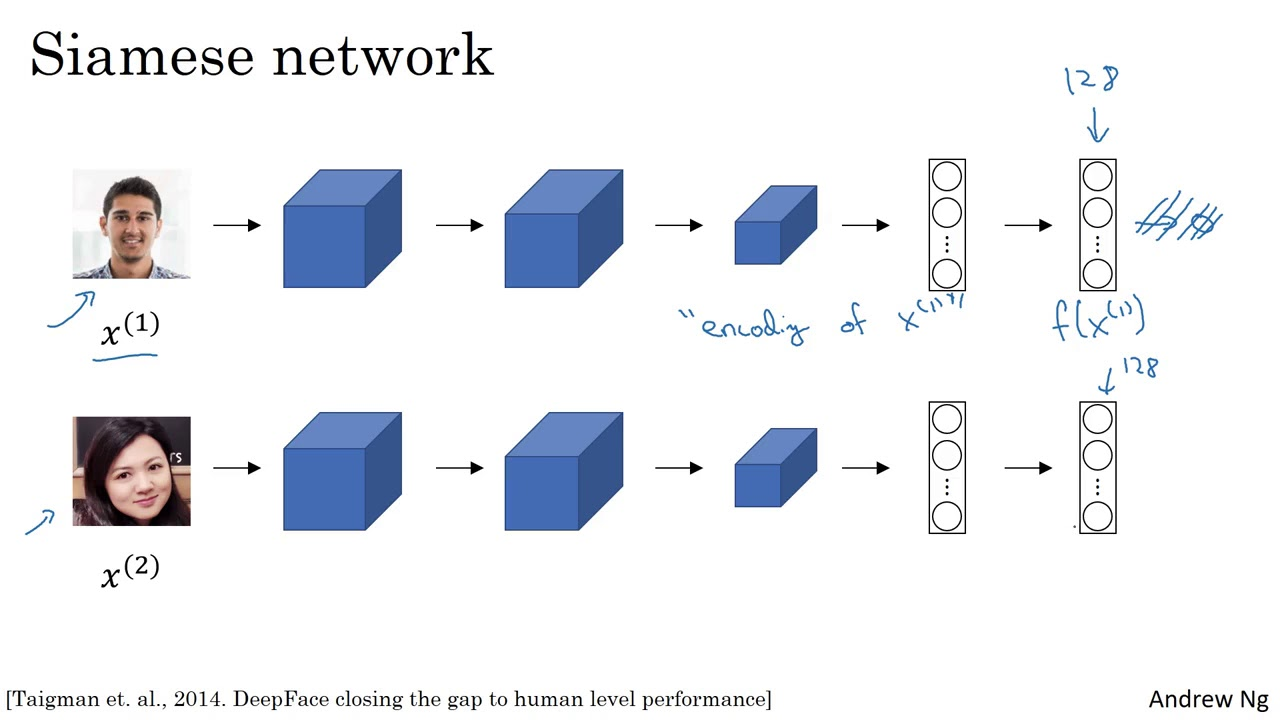

In the context of **face recognition**, a **Siamese Network** takes as **input two facial images** and **learns to output a similarity score** that indicates how **similar the two images are in terms of facial features**. The network does this by **first encoding each image into a feature vector**, and then **comparing the two feature vectors** to compute the **similarity score**. **Siamese Networks** have also been used in other applications, such as **text similarity, signature verification, and even music recommendation systems**. They have proven to be a **useful tool** for **many similarity and distance measurement tasks**, and their **versatility makes them a valuable addition** to the **machine learning toolkit**.

The utilization of a **Siamese network** for **face recognition** purposes is based on its ability to **generate embeddings**, which are **128-dimensional vectors** present in a **vector space**, for **all images** present in our **database**. When a **new image** is inputted, an **embedding** for it is **produced** and **compared** with the **rest of the embedding** present in our **database**. If a **match is found**, it can be **concluded** that the **inputted image belongs to the same person** as the **matched image in the database**, allowing for **face recognition** to be performed. The **embeddings** produced by the **Siamese network** enable this **comparison** to be made with a **high degree of accuracy**, as they contain **rich information** about **facial features** and **their relationships with one another**.

---
For this, we need a function that can **compare two embeddings**.

In [ ]:
def compare_embeddings(embedding_1: np.ndarray, embedding_2: np.ndarray, threshold: float = 0.8) -> int:
    """
    Compares two embeddings and returns 1 if the distance between them is less than the threshold, else 0.

    Args:
    - embedding_1: A 128-dimensional embedding vector.
    - embedding_2: A 128-dimensional embedding vector.
    - threshold: A float value representing the maximum allowed distance between embeddings for them to be considered a match.

    Returns:
    - 1 if the distance between the embeddings is less than the threshold, else 0.
    """

    # Calculate the distance between the embeddings
    embedding_distance = embedding_1 - embedding_2

    # Calculate the L2 norm of the distance vector
    embedding_distance_norm = np.linalg.norm(embedding_distance)

    # Return 1 if the distance is less than the threshold, else 0
    return embedding_distance_norm if embedding_distance_norm < threshold else 0

In [ ]:
def recognize_face(image: np.ndarray, database: dict, threshold: float = 1.0, model = model) -> str:
    """
    Given an image, recognize the person in the image using a pre-trained model and a database of known faces.
    
    Args:
        image (np.ndarray): The input image as a numpy array.
        database (dict): A dictionary containing the embeddings of known faces.
        threshold (float): The distance threshold below which two embeddings are considered a match.
        model (keras.Model): A pre-trained Keras model for extracting image embeddings.
        
    Returns:
        str: The name of the recognized person, or "No Match Found" if no match is found.
    """
    
    # Generate embedding for the new image
    image_emb = image_to_embedding(image, model)
    
    # Clear output
    cls()
    
    # Store distances
    distances = []
    names = []
    
    # Loop over database
    for name, embed in database.items():
        
        # Compare the embeddings
        dist = compare_embeddings(embed, image_emb, threshold=threshold)
        
        if dist > 0:
            # Append the score
            distances.append(dist)
            names.append(name)
    
    # Select the min distance
    if distances:
        min_dist = min(distances)
    
        return names[distances.index(min_dist)].title().strip()
    
    return "No Match Found"

Let's have a quick look at the functioning of the function.

In [ ]:
# Randomly select an index
index = np.random.randint(len(all_images))

# Obtain an image and its corresponding label
image_ = all_images[index]
label_ = person_names[int(all_labels[index])]

# Recognize the face in the image
title = recognize_face(image_, database)

# Plot the image along with its true and predicted labels
plt.imshow(image_)
plt.title(f"True:{label_}\nPred:{title}")
plt.axis('off')
plt.show()

In [ ]:
show_data(all_images, all_labels, recog_fn = recognize_face, database = database)

In [ ]:
show_data(all_images, all_labels, recog_fn = recognize_face, database = database)

This model is **remarkable** in its **ability to accurately detect** nearly **all individuals** in the **images**. While there are a **few errors**, a **broader examination** of the **image shows that the** model **performs exceptionally well overall**. This level of performance is likely due to the **average embeddings** that were calculated for **each individual**. These encodings contain the **average of any variations** that may occur within an image, allowing the model to become **robust and recognize individuals** with a **high degree of accuracy**. 

The model's **efficiency** is **largely due** to its focus on **calculating the similarities** between embeddings and **comparing the distances between** them, which **greatly increases** its **speed and accuracy**. Overall, this model is a **highly effective tool** for **facial recognition** and demonstrates the power of **machine learning** in **identifying individuals** with **remarkable accuracy**.

The **final decision** is up to you, but I **highly recommend** trying out **some additional visualizations** to confirm the **model's performance**. In my experience, this model is **truly exceptional**. Its **speed and accuracy** are **unparalleled**, making it an **excellent option for recognition purposes**. The fact that it can be **easily installed** on devices further adds to its **convenience and practicality**.

However, it is important to note that **setting a suitable threshold** and **database is crucial** for **optimal performance**, even though **perfection may not always be attainable**. Therefore, identifying a **rough estimate of the best possible configuration is essential**.

---
**Thank you** for taking the time to read through this information. We hope that you have **found it informative and helpful**. We **encourage you** to **leave your thoughts and comments in the comment section,** as we value your **feedback** and would **love to hear from you**. **Thank you again for your interest, and we look forward to hearing from you.**

---
**DeepNets**

# **Extra : Large Database**
---

Before moving ahead, let's take a mathematical approach to evaluate the performance of our model. Let's analyze its **accuracy**. It's worth noting that the **accuracy of the model** is also calculated on a **subset of the dataset**, which is **selected randomly**. However, when these **subsets are averaged out**, the **accuracy remains approximately the same**. Therefore, below we are **only presenting the accuracy of the chosen subset**.

In [ ]:
# Count the number of images
n_images = 50

# Initialize the number of correct predictions
n_correct = 0

# Randomly Select images
indicies = np.random.permutation(n_images)
temp_images = all_images[indicies]
temp_labels = all_labels[indicies]

# Iterate over each image and its corresponding label
for (image, label) in zip(temp_images, temp_labels):
    
    # Extract the true label of the person in the image
    true_label = person_names[int(label)]

    # Use the recognize_face function to predict the label of the person in the image
    pred_label = recognize_face(image, database)

    # If the true label and the predicted label match, increment the number of correct predictions
    if true_label == pred_label:
        n_correct += 1

# Calculate the accuracy of the model
acc = (n_correct / n_images) * 100.0

# Print the accuracy of the model
print(f"Model Accuracy: {acc}%!!!")

As we discussed earlier, the **size of the database** plays a **crucial role in** **facial recognition accuracy**. To further **analyze the performance** of our model, we can **increase the size of the database** and **observe its impact on the accuracy**. A **larger database** can help the **model learn** and **recognize faces** more **effectively,** leading to improved accuracy** in facial recognition tasks**.

In [ ]:
# Select all the file paths : 50 images per person.
filepaths = [np.random.choice(glob(root_path + name + '/*'), size=50) for name in dir_names]

# Create data base
large_database = {name:generate_avg_embedding(paths, model=model) for paths, name in tqdm(zip(filepaths, person_names), desc="Generating Embeddings")}

In [ ]:
show_data(all_images, all_labels, recog_fn = recognize_face, database = large_database)

Having a **sufficient database** is **crucial for accurate face recognition**. In order to improve our model's performance, we **increased the size of our database by computing 50 embeddings per person and averaging them to obtain a single embedding per person**. By doing so, we were able to **significantly improve the accuracy of our model**.

In [ ]:
# Count the number of images
n_images = 100

# Initialize the number of correct predictions
n_correct = 0

# Randomly Select images
indicies = np.random.permutation(n_images)
temp_images = all_images[indicies]
temp_labels = all_labels[indicies]

# Iterate over each image and its corresponding label
for (image, label) in zip(temp_images, temp_labels):
    
    # Extract the true label of the person in the image
    true_label = person_names[int(label)]

    # Use the recognize_face function to predict the label of the person in the image
    pred_label = recognize_face(image, large_database)

    # If the true label and the predicted label match, increment the number of correct predictions
    if true_label == pred_label:
        n_correct += 1

# Calculate the accuracy of the model
acc = (n_correct / n_images) * 100.0

# Print the accuracy of the model
print(f"Model Accuracy: {acc}%!!!")

To further improve the **model's performance**, we increased the **size of the database to 50 embeddings per person and then averaged them to get one embedding per person**. This led to a **noticeable increase in accuracy,** with the previous **accuracy of 90% being improved to 92% by using the larger database**. This demonstrates the importance of having a **large and diverse database** for **face recognition models to achieve higher accuracy**.

In [ ]:
# Select all the file paths : 50 images per person.
filepaths = [np.random.choice(glob(root_path + name + '/*'), size=25) for name in dir_names]

# Create data base
med_database = {name:generate_avg_embedding(paths, model=model) for paths, name in tqdm(zip(filepaths, person_names), desc="Generating Embeddings")}

In [ ]:
show_data(all_images, all_labels, recog_fn = recognize_face, database = med_database)

In [ ]:
# Count the number of images
n_images = 100

# Initialize the number of correct predictions
n_correct = 0

# Randomly Select images
indicies = np.random.permutation(n_images)
temp_images = all_images[indicies]
temp_labels = all_labels[indicies]

# Iterate over each image and its corresponding label
for (image, label) in zip(temp_images, temp_labels):
    
    # Extract the true label of the person in the image
    true_label = person_names[int(label)]

    # Use the recognize_face function to predict the label of the person in the image
    pred_label = recognize_face(image, med_database)

    # If the true label and the predicted label match, increment the number of correct predictions
    if true_label == pred_label:
        n_correct += 1

# Calculate the accuracy of the model
acc = (n_correct / n_images) * 100.0

# Print the accuracy of the model
print(f"Model Accuracy: {acc}%!!!")

While the companion shows the benefits of using a **larger dataset**, I still prefer to work with the **medium-sized dataset** for this project. In my opinion, **large datasets** can introduce **some noise** into the **embeddings**, which can **negatively impact** the **accuracy of the model**. Therefore, it is **crucial to ensure** that the **embeddings** are as **accurate as possible. For this reason**, I found that having an **average of 20 embeddings per person is sufficient for achieving high accuracy.**

---
Note : To obtain a **significant improvement** in the performance of the **face recognition model**, it is **crucial to retrain** it using the **new data set.** In our case, we only used a **pre-trained network** and achieved an **impressive 92% accuracy** on the **face recognition method**. However, if we want to take our **model's accuracy to the next level, we must train it on more extensive and diverse data sets**.

**Retraining the model** on **new data** will help it **learn and recognize different facial features** that were **not present in the original data set**. Moreover, it will help to **eliminate any bias** that **may have existed** in the **previous data set. This bias may** have resulted from the **lack of diversity in the original data set**, leading to **inaccurate or incomplete facial recognition**.